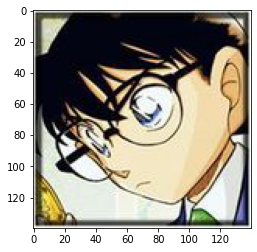

In [1]:
# 图像加载与展示
import numpy as nu
import matplotlib.pyplot as plt
from skimage import io as io
img = io.imread('1.jpg')
plt.imshow(img)

In [5]:
#查看数据结构与维度
print(type(img))
print(img.shape)
#查看数据内容
print(img)

<class 'numpy.ndarray'>
(140, 140, 3)
[[[254 254 252]
  [255 255 251]
  [246 247 242]
  ...
  [255 255 248]
  [255 255 250]
  [254 250 247]]

 [[255 255 251]
  [196 195 190]
  [137 136 131]
  ...
  [125 122 115]
  [183 180 175]
  [255 254 251]]

 [[244 244 236]
  [135 135 127]
  [ 42  42  32]
  ...
  [ 45  42  35]
  [135 132 127]
  [255 252 249]]

 ...

 [[255 255 248]
  [125 125 117]
  [  6   6   0]
  ...
  [  0   1   7]
  [ 95 101  99]
  [243 250 243]]

 [[250 252 239]
  [180 182 169]
  [112 112 100]
  ...
  [104 110 110]
  [160 166 162]
  [248 255 247]]

 [[255 255 243]
  [255 255 243]
  [251 253 240]
  ...
  [240 246 244]
  [246 252 248]
  [250 255 250]]]


In [8]:
#维度存储
img_width = img.shape[1]
img_height = img.shape[0]
print(img_width, img_height)

140 140


In [17]:
#数据维度转化
img_data = img.reshape(-1,3)
print(img.shape,img_data.shape)
print(img_data)

(140, 140, 3) (19600, 3)
[[254 254 252]
 [255 255 251]
 [246 247 242]
 ...
 [240 246 244]
 [246 252 248]
 [250 255 250]]


In [18]:
#模型建立与训练
from sklearn.cluster import KMeans
x = img_data
model = KMeans(n_clusters=3,random_state=0)
model.fit(x)

KMeans(n_clusters=3, random_state=0)

In [21]:
#聚类结果预测
import pandas as pd
label = model.predict(x)
print(label)
print(pd.value_counts(label))

[1 1 1 ... 1 1 1]
1    9230
0    7125
2    3245
dtype: int64


In [24]:
#结果数据的维度转化
label = label.reshape([img_height,img_width])
print(label)
print(label.shape)

[[1 1 1 ... 1 1 1]
 [1 1 2 ... 2 1 1]
 [1 2 0 ... 0 2 1]
 ...
 [1 2 0 ... 0 2 1]
 [1 1 2 ... 2 2 1]
 [1 1 1 ... 1 1 1]]
(140, 140)


In [25]:
#后续的灰度处理
label = 1/(label+1)
print(label)

[[0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
 [0.5        0.5        0.33333333 ... 0.33333333 0.5        0.5       ]
 [0.5        0.33333333 1.         ... 1.         0.33333333 0.5       ]
 ...
 [0.5        0.33333333 1.         ... 1.         0.33333333 0.5       ]
 [0.5        0.5        0.33333333 ... 0.33333333 0.33333333 0.5       ]
 [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]]


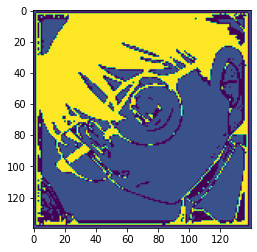

In [26]:
#结果可视化
plt.imshow(label)

In [27]:
#图像存储到本地
io.imsave('result.png',label)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


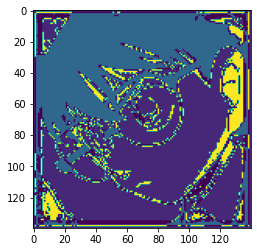

In [30]:
model = KMeans(n_clusters=4,random_state=0)
model.fit(x)
label = model.predict(x)
label = label.reshape([img_height,img_width])
label = 1/(label+1)
plt.imshow(label)
io.imsave('result2.png',label)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


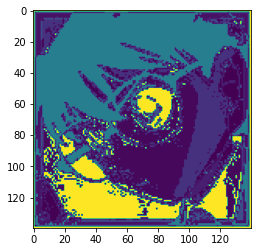

In [31]:
model = KMeans(n_clusters=8,random_state=0)
model.fit(x)
label = model.predict(x)
label = label.reshape([img_height,img_width])
label = 1/(label+1)
plt.imshow(label)
io.imsave('result3.png',label)